# 5.3.4 The Bootstrap

Load modules and data

In [4]:
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt

Portfolio = pd.read_csv('Portfolio.csv')
Boston = pd.read_csv('Boston.csv')
Auto = pd.read_csv('Auto.csv',usecols=list([0, 3]))
Auto = Auto[Auto.horsepower !="?"]
s = pd.Series(Auto.horsepower)
Auto.horsepower=pd.to_numeric(s,downcast='float')

Load predefined functions

In [5]:
# Custom made covariance to avoid a complete covariance matrix
def cov(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    data = [(x[i] - x_mean) * (y[i] - y_mean)
            for i in range(len(x))]
    return sum(data) / (len(data) - 1)
#############################################################################
# Apha function for first part of the lap
def alpha_func(data, index):
    X = data.X[index]
    Y = data.Y[index]
 
    alpha = ((np.var(Y)-np.cov(X,Y,bias=True))[0,1]/(np.var(X)+np.var(Y) -2*np.cov(X,Y,bias=True)[0,1]))
    return alpha
# Random sampler n times with data range
def resample_(data, n=None):
    if n == None:
        n = len(X)
        
    resample_i = np.floor(np.random.rand(n)*len(data)).astype(int)
    return resample_i
#############################################################################
# Boot function for simple linear regression model on auto data
def boot_func_lin(data, index):
    lm = sm.OLS.from_formula('mpg ~ horsepower', data, subset=index)
    lm_fit = lm.fit()
    return [lm_fit.params[0],lm_fit.params[1]]
#############################################################################
# Boot function for multiple linear regression model on auto data
def boot_func_lin2(data, index):
    lm = sm.OLS.from_formula('mpg ~ horsepower+ I(horsepower**2)', data, subset=index)
    lm_fit = lm.fit()
    return [lm_fit.params[0],lm_fit.params[1],lm_fit.params[2]]
#############################################################################
# Boot function for simple linear regression model on Boston data
def boot_func_lin3(data, index):
    lm = sm.OLS.from_formula('medv ~ lstat', data, subset=index)
    lm_fit = lm.fit()
    return [lm_fit.params[0],lm_fit.params[1]]

Calculate baseline statistics for Portfolio data set

In [6]:
alpha_orig = alpha_func(Portfolio,range(0,99))
print(np.mean(alpha_orig))

0.576276248383


Calculate statistics for Portfolio dataset using 100 random selected data

In [7]:
N = 100
alpha_ = alpha_func(Portfolio,resample_(Portfolio,N))

print(np.mean(alpha_))

0.248181050048


Calculate SLR statistics for Portfolio dataset using 1000 random selected data

In [8]:
data = Portfolio
N_set = 1000
n_sample = len(data)

alpha_  = np.zeros((N_set,1)) 

for i in range(0,N_set):
    alpha_[i] = alpha_func(Portfolio,resample_(Portfolio,n_sample))

    
print(np.mean(alpha_))
print(np.std(alpha_))
print(np.mean(alpha_)-alpha_orig)

0.578229754378
0.086200460829
0.00195350599434


## Auto data set analysis

Calculate baseline statistics for Auto data set for both SLR and MLR

In [9]:
beta_orig = boot_func_lin(Auto,range(0,391))
print("Single run using all data and one predictor")
print("[Coefficients - Intercept Horsepower]")
print(beta_orig)

beta_orig_2 = boot_func_lin2(Auto,range(0,391))
print("\nSingle run using all data and two predictor")
print("[Coefficients - Intercept Horsepower Horsepower^2]")
print(beta_orig_2)


Single run using all data and one predictor
[Coefficients - Intercept Horsepower]
[39.709923672736977, -0.15628425943517577]

Single run using all data and two predictor
[Coefficients - Intercept Horsepower Horsepower^2]
[56.447212048217068, -0.46004758929267719, 0.0012108478168661979]


Calculate SLR statistics for Auto dataset using 2 random selected data

In [10]:
# Part 2.2) Random 2 times action on Auto data
n_sample = len(Auto)
x = resample_(Auto, n_sample)
beta_ = boot_func_lin(Auto,x)
print("Random run 1")
print("[Coefficients - Intercept Horsepower]")
print(beta_)
print("[Biased - Intercept Horsepower]")
print([beta_[0]-beta_orig[0],beta_[1]-beta_orig[1]])

Random run 1
[Coefficients - Intercept Horsepower]
[40.223973037816343, -0.15927454315591671]
[Biased - Intercept Horsepower]
[0.51404936507936583, -0.0029902837207409494]


Calculate SLR statistics for Auto dataset using 1000 random selected data

In [11]:
# Part 2.3) Random N_set times action on Auto data
N_set = 1000
n_sample = len(Auto)

beta_  = np.zeros((N_set,2)) 

for i in range(0,N_set):
    x = resample_(Auto, n_sample)
    beta_[i] = boot_func_lin(Auto, x)
print("Mean values for N_set runs\n")
print("[Coefficients - Intercept Horsepower]")
print([np.mean(beta_[:,0]), np.mean(beta_[:,1])])
print("\n[Std. Error - Intercept Horsepower]")
print([np.std(beta_[:,0]), np.std(beta_[:,1])])
print("\n[Biased - Intercept Horsepower]")
print([np.mean(beta_[:,0])-beta_orig[0],np.mean(beta_[:,1])-beta_orig[1]])

Mean values for N_set runs

[Coefficients - Intercept Horsepower]
[39.754797579966876, -0.15680077898154085]

[Std. Error - Intercept Horsepower]
[0.82942105099398067, 0.0072556225087268608]

[Biased - Intercept Horsepower]
[0.044873907229899146, -0.00051651954636508512]


Calculate MLR statistics for Auto dataset using 1000 random selected data

In [12]:
N_set = 1000
n_sample = len(Auto)

beta_  = np.zeros((N_set,3)) 

for i in range(0,N_set):
    x = resample_(Auto, n_sample)
    beta_[i] = boot_func_lin2(Auto, x)
print("Mean values for N_set runs using 2 predictors\n")
print("[Coefficients - Intercept Horsepower Horsepower^2]")
print([np.mean(beta_[:,0]), np.mean(beta_[:,1]), np.mean(beta_[:,2])])
print("\n[Std. Error - Intercept Horsepower Horsepower^2]")
print([np.std(beta_[:,0]), np.std(beta_[:,1]), np.std(beta_[:,2])])
print("\n[Biased - Intercept Horsepower  Horsepower^2]")
print([np.mean(beta_[:,0])-beta_orig_2[0],np.mean(beta_[:,1])-beta_orig_2[1],np.mean(beta_[:,2])-beta_orig_2[2]])

Mean values for N_set runs using 2 predictors

[Coefficients - Intercept Horsepower Horsepower^2]
[56.475229595537158, -0.46055751934568573, 0.0012128802274402233]

[Std. Error - Intercept Horsepower Horsepower^2]
[2.0484726645733775, 0.032580012975744345, 0.00011781519343417369]

[Biased - Intercept Horsepower  Horsepower^2]
[0.028017547320089875, -0.00050993005300853378, 2.0324105740254176e-06]


## Boston data set analysis
Calculate baseline statistics for Boston data set for both SLR

In [13]:
beta_orig = boot_func_lin3(Boston,range(0,len(Boston)))
print(beta_orig)

[34.553840879383117, -0.9500493537579906]


Calculate SLR statistics for Boston dataset using 1000 random selected data

In [14]:
N_set = 1000
n_sample = len(Boston)

beta_  = np.zeros((N_set,2)) 

for i in range(0,N_set):
    x = resample_(Boston, n_sample)
    beta_[i] = boot_func_lin3(Boston, x)
print("Mean values for N_set runs\n")
print("[Coefficients - Intercept lstat]")
print([np.mean(beta_[:,0]), np.mean(beta_[:,1])])
print("\n[Std. Error - Intercept lstat]")
print([np.std(beta_[:,0]), np.std(beta_[:,1])])
print("\n[Biased - Intercept lstat]")
print([np.mean(beta_[:,0])-beta_orig[0],np.mean(beta_[:,1])-beta_orig[1]])

Mean values for N_set runs

[Coefficients - Intercept lstat]
[34.522661445627527, -0.94835769366940226]

[Std. Error - Intercept lstat]
[0.76530147996889031, 0.050466611343629814]

[Biased - Intercept lstat]
[-0.031179433755589514, 0.0016916600885883426]


Plot histogram for boston bootstrap coefficients

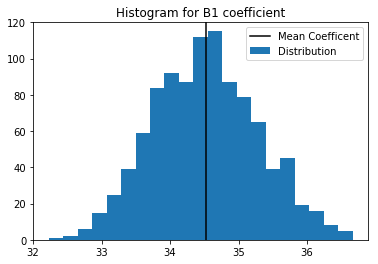

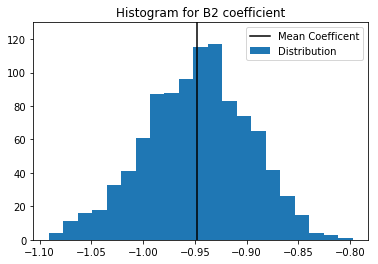

In [15]:
a = np.hstack(beta_[:,0])
plt.hist(a, bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram for B1 coefficient")
plt.hold
plt.plot([np.mean(beta_[:,0]), np.mean(beta_[:,0])],[0, np.max(120)],'k')
plt.ylim([0,120])
plt.legend(['Mean Coefficent','Distribution'])
plt.show()

a = np.hstack(beta_[:,1])
plt.hist(a, bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram for B2 coefficient")
plt.hold
plt.plot([np.mean(beta_[:,1]), np.mean(beta_[:,1])],[0, np.max(130)],'k')

plt.ylim([0,130])
plt.legend(['Mean Coefficent','Distribution'])
plt.show()


